# Main objective: Assessing OLST performance

###### In this script, we are using unsupervied machine learning to assess the performance of the One Leg Balance Test. For input metric, it is a N raws * 128 columns dataframe. The input parameters include different features during One Leg Balance Test trail such as 
* 1.	Lifting forefoot or heel  
* 2.   Moving hip into more than 30 degrees of flexion or abduction  
* 3.	Stepping, stumbling, or falling 
* 4.	Lifting hands off iliac crests


## Step 1: Load and create the dataset

In [109]:
import pandas as pd
import numpy as np
import os

In [110]:
raw_df = pd.read_csv("SL_df.csv")
target_df = pd.read_csv("SL_target.csv")

In [126]:
raw_df.head()
SL_train = raw_df.drop(["sub"], axis = 1)
SL_input = SL_train.iloc[:,1:]
SL_target = target_df.iloc[:,1:]

## Step 2: Preprocessing the data

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [128]:
scaler = StandardScaler()
onehotencoder = OneHotEncoder()

In [129]:
SL_input_processed = scaler.fit_transform(SL_input)
SL_target_processed = np.array(SL_target["overall_rate"])

In [148]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [130]:
train_num = round(0.8 * len(SL_input_processed))
test_num = round(0.2 * len(SL_input_processed))

In [131]:
x_train = SL_input_processed[:train_num]
y_train = SL_target_processed[:train_num]

x_test = SL_input_processed[train_num:]
y_test = SL_target_processed[train_num:]

## Step 3: Feature selection

## Step 4: Train and testing the model

In [132]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

SVC_reg = SVC()
DT_reg = DecisionTreeClassifier()
Log_reg = LogisticRegression()
RF_reg = RandomForestClassifier()

In [133]:
from sklearn.model_selection import GridSearchCV

SVC_para = {
    "C":[1,1.2,2,2.5,3],
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "degree":[3,4,5],
    "probability":[True]
}

DT_para = {
    "criterion": ["gini", "entropy"],
    'max_depth': [1,2,3,4,5], 
    'max_leaf_nodes': [2,3,4,5]
}

Log_para = {
    "penalty": ['l2', 'none'],
    "C":[1,1.2,2,2.5,3],
    "max_iter":[200, 300, 400],
    "solver":['lbfgs']
}

RF_para = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [1,2,3], 
    'max_leaf_nodes': [2,3,4,5], 
    'n_estimators': [ 100, 200, 300]
}


In [134]:
SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
SVC_grid_search.fit(x_train, y_train.ravel())
SVC_grid_search.best_params_

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 3, 'degree': 3, 'kernel': 'poly', 'probability': True}

In [135]:
DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
DT_grid_search.fit(x_train, y_train)
DT_grid_search.best_params_

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 3}

In [136]:
SVC_best_reg = SVC_grid_search.best_estimator_
DT_best_reg = DT_grid_search.best_estimator_

## Step 4: Evaluate the model

In [137]:
SVC = SVC_best_reg.fit(x_train, y_train)
SVC.score(x_train, y_train)

0.9230769230769231

In [138]:
DT = DT_best_reg.fit(x_train, y_train)
DT.score(x_train, y_train.ravel())

0.9230769230769231

In [139]:
SVC.score(x_test, y_test)

0.6

In [140]:
DT.score(x_test, y_test)

0.8

In [141]:
svc_pred = SVC.predict_proba(x_train)

In [142]:
dt_pred = DT.predict(x_test)

In [143]:
import scikitplot as skplt
import matplotlib.pyplot as plt



C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


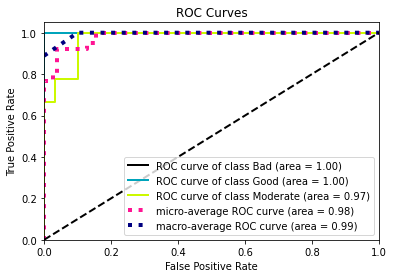

In [144]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_train
y_probas = svc_pred
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [145]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [146]:
acc_3_t = accuracy_score(SVC.predict(x_train), y_train)
cm_3_t = confusion_matrix(SVC.predict(x_train), y_train)
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("acc: " + str(acc_3_t) + "\n" + "recall: " + str(recall_3_t) + "\n" + "precision: " + str(precision_3_t))

acc: 0.9230769230769231
recall: 0.9642857142857143
precision: 0.8888888888888888


In [147]:
acc_3_t = accuracy_score(DT.predict(x_train), y_train)
cm_3_t = confusion_matrix(DT.predict(x_train), y_train)
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("acc: " + str(acc_3_t) + "\n" + "recall: " + str(recall_3_t) + "\n" + "precision: " + str(precision_3_t))

acc: 0.9230769230769231
recall: 0.9166666666666666
precision: 0.9066666666666667
